In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

sns.set_style('white')

## Creating a Model To Predict Credit Card Fraud<br>Eve Ben Ezra


The goal of this project is to create a machine learning algorithm that can predict when credit card fraud occurs. Hopefully, our algorithm will also prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

The dataset comes from Kaggle and can be found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The relevant headers V1...V28 are the principal components obtained with PCA.

In [3]:
# Read in the data

data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# check for missing data

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There's no missing data

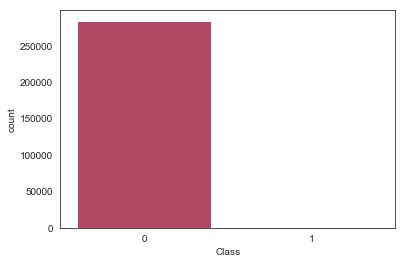

In [42]:
# Explore the balance for the target variable. Is there class imbalance?

c_scheme = ['#C2375C','#FF9866','#DFDD19','#00A546','#199DDF','#AA57DF']

sns.countplot(x='Class',data=data,palette=c_scheme)

There's a *giant* class imbalance. Going on. Let's see just how big it is.

In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Of all of our transactions, 248,315 are non-fradulent and 492 are fradulent. That's a pretty big class imbalance, but let's see if we can find out a little more about it and what patterns that are between the two classes.

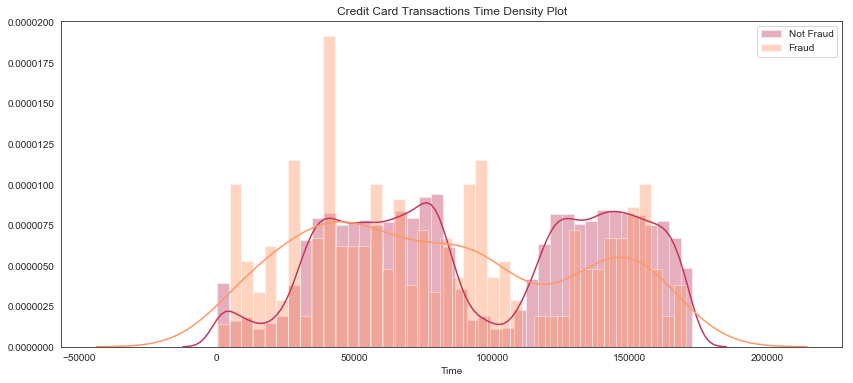

In [43]:
transactions = data.loc[data['Class'] == 0]['Time']
fraud = data.loc[data['Class'] == 1]['Time']

plot_data = [transactions, fraud]
labels = ['Not Fraud','Fraud']

plt.figure(figsize = (14,6))
plt.title('Credit Card Transactions Time Density Plot')
sns.distplot(transactions,kde=True,bins=40,color='#C2375C')
sns.distplot(fraud,kde=True,bins=40, color='#FF9866')
plt.legend(labels)
plt.show()

Non-fradulent transactions have a more even distribution than fradulent transactions, as well as two peaks -- around 50,000 seconds and 150,000 seconds. Fradulent transactions have the most frequency around 40,000 seconds, and drop off in frequency after that.

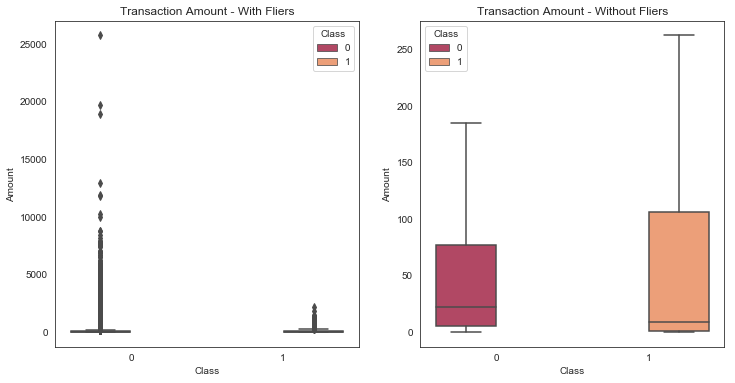

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette=c_scheme,showfliers=True).set_title('Transaction Amount - With Fliers')
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette=c_scheme,showfliers=False).set_title('Transaction Amount - Without Fliers')
plt.show();

The median amount spent on fradulent transactions is lower than non-fradulent transactions. Real transactions have a much higher range of outliers compared with fradulent transactions. The max fradulent transaction in the dataset is 2,125 dollars compared with $25,691 max transaction in the non-fradulent category.

# Modeling Attempt 1: Logistic Regression

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Train the model and make predictions

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = logmodel.predict(X_test)

### Evaluate

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.80      0.67      0.73       153

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predictions)

array([[85265,    25],
       [   50,   103]])

Our test set contained 85,290 cases that were not fradulent and 153 cases where it was fradulent. Our model caught 103 actual cases of fraud, but missed 50 cases of fraud and designated them as 'not fraud'. 25 non-fraudulent transactions were mistakenly categorized as fraud.

This is a very disappointing result, as we missed 33% of the fraud cases in our test set, which is a big deal. In this case we want a higher-recall model, and recall for fraud is only 67%, as opposed to 80% precision. 

# Model Attempt 2: Random Forest


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

It took a really, really long time to run the one with 100 estimators. Playing around to find a time when n_estimators isn't prohibitive, but stil gives an ok result.

In [75]:
rfc2 = RandomForestClassifier(n_estimators=20)
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluate

In [56]:
from sklearn.model_selection import cross_val_score

In [62]:
# The Model Takes Too long to run
#cross_val_score(rfc, X_train, y_train, cv=5)

array([0.00510867, 0.99954356, 0.99894665, 0.9995611 , 0.99943821])

The model was continually killing my kernel when I tried to run the cross-validation, so I'm going with evaluation using the confusion matrix and classification report instead. An alternative would be to use a smaller number of n estimators, but that sacrifices some of the accuracy

In [72]:
# Where n_estimators = 100
rfc_pred = rfc.predict(X_test)

In [73]:
print(confusion_matrix(y_test,rfc_pred))

[[85282     8]
 [   32   121]]


In [74]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.94      0.79      0.86       153

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [76]:
# Where n_estimators = 20

rfc_pred2 = rfc2.predict(X_test)

In [77]:
print(confusion_matrix(y_test,rfc_pred2))

[[85284     6]
 [   33   120]]


In [78]:
print(classification_report(y_test,rfc_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.95      0.78      0.86       153

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Random forest gives us better confusion matrix, with only 33 fradulent transactions not caught. We greatly, greatly reduced non-fradulent transactions from being caught, but that's not as important as not letting fradulent cases through.

However: Random Forest takes **a long time** and without the cross validation scores, I'm hesitant to call it a success or talk about overfitting in the model on the training set versus the test set. I want to try and find a way to reduce the time that random forest took, as it took a really long time even when the estimators were set at 20. This is because of the size of the dataset. 

### Attempting to Reduce the Time Random Forest Takes 

In [80]:
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [81]:
target = 'Class'

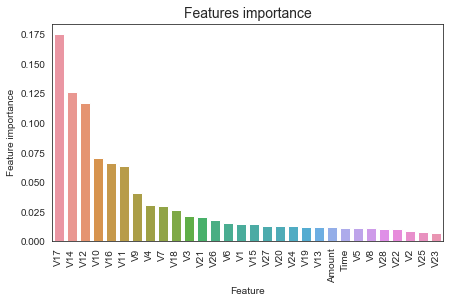

In [84]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

What if we change our model to only look at the 10 most important features? That looks like V17, V14, V12, V10, V16, V11, V9, V4, V7, and V18.

In [85]:
X = data[['V17', 'V14', 'V12', 'V10', 'V16', 'V11', 'V9', 'V4', 'V7', 'V18']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [86]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
# The Model Takes Too long to run
cross_val_score(rfc, X_train, y_train, cv=5)

array([0.9995235 , 0.99937301, 0.99957365, 0.99967396, 0.99959872])

In [91]:
# And cross validation for our test data

cross_val_score(rfc, X_test, y_test, cv=5)

array([0.99953189, 0.99959038, 0.99935627, 0.99941479, 0.99953184])

The cross-validation still took a very long time, but it didn't kill my kernel. The accuracy looks good across the board, but let's check the confusion matrix.

In [88]:
rfc_pred = rfc.predict(X_test)

In [89]:
print(confusion_matrix(y_test,rfc_pred))

[[85298     9]
 [   31   105]]


Random Forest seems to be the best model for this, but we're still getting a lot of fraud that is passing through as not-fraud.